In [1]:
#for giving an array 
import numpy as np
#for Data Analysis
import pandas as pd
#For drawing 2D Graphs
import matplotlib.pyplot as plt
%matplotlib inline
#For drawing 3D graph
import seaborn as sns
#Splitting the data into train and test using the sklearn.model_selection libray
from sklearn.model_selection import train_test_split
#Using the in built Knn alogrithm
from sklearn.neighbors import KNeighborsClassifier
#Calculating the cross val score using sklearn libray
from sklearn.model_selection import cross_val_score
#Getting the accuracy and claassification report
from sklearn.metrics import  accuracy_score, classification_report,confusion_matrix
from sklearn import metrics

In [2]:
#Reading the file
iris_data = pd.read_csv("iris-flower-datasets.csv")
#getting top 5 rows from dataframe
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
iris_data.fillna(method='ffill', inplace=True)

C:\Users\VENKATESH\AppData\Local\Temp\ipykernel_17000\288243361.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  iris_data.fillna(method='ffill', inplace=True)


In [5]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data['species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: species, dtype: object

<Figure size 640x480 with 0 Axes>

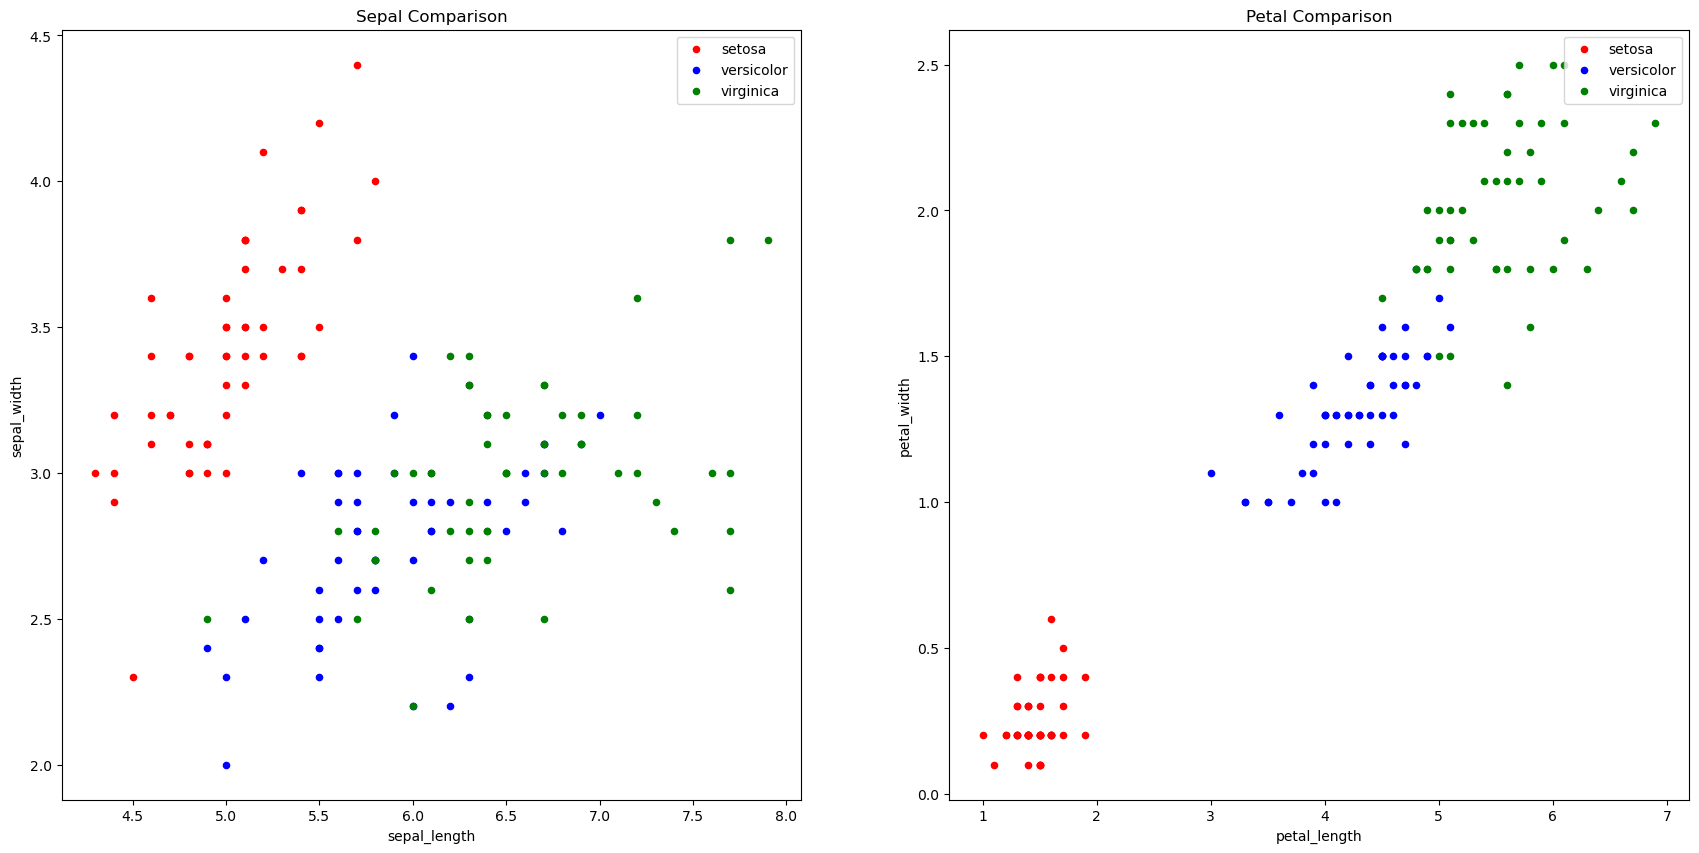

In [8]:
# Correct the column names in the scatter plot code
setosa = iris_data[iris_data['species']=='Iris-setosa']
versicolor = iris_data[iris_data['species']=='Iris-versicolor']
virginica = iris_data[iris_data['species']=='Iris-virginica']

# For each species, let's check the petal and sepal distribution
plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(21, 10))

# Creating the scatter plot for each species with sepal length, width, petal length, width
setosa.plot(x="sepal_length", y="sepal_width", kind="scatter", ax=ax[0], label='setosa', color='r')
versicolor.plot(x="sepal_length", y="sepal_width", kind="scatter", ax=ax[0], label='versicolor', color='b')
virginica.plot(x="sepal_length", y="sepal_width", kind="scatter", ax=ax[0], label='virginica', color='g')

setosa.plot(x="petal_length", y="petal_width", kind="scatter", ax=ax[1], label='setosa', color='r')
versicolor.plot(x="petal_length", y="petal_width", kind="scatter", ax=ax[1], label='versicolor', color='b')
virginica.plot(x="petal_length", y="petal_width", kind="scatter", ax=ax[1], label='virginica', color='g')

# Setting the axis labels and titles
ax[0].set(title='Sepal Comparison', ylabel='sepal_width')
ax[1].set(title='Petal Comparison', ylabel='petal_width')
ax[0].legend()
ax[1].legend()

# Show the graph
plt.show()


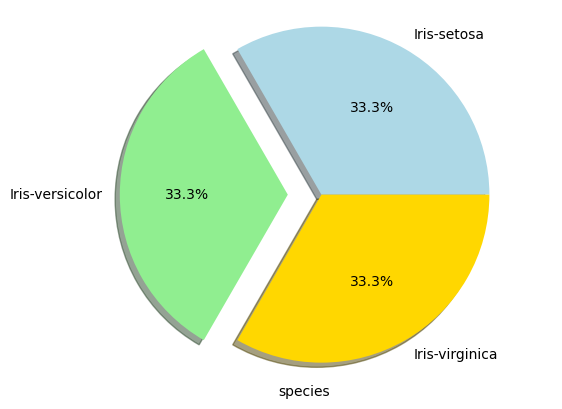

In [9]:
a= iris_data['species'].value_counts()
#Creating the pie chart
species = a.index
count = a.values
colors= ['lightblue','lightgreen','gold']
explode = (0,0.2,0)
plt.pie(count, labels=species,shadow=True,colors=colors,explode = explode, autopct='%1.1f%%')
plt.xlabel('species')
plt.axis('equal')
#Showing the grapg
plt.show()

In [10]:
X=iris_data.iloc[:,0:4].values
y=iris_data.iloc[:,4].values

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []
# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

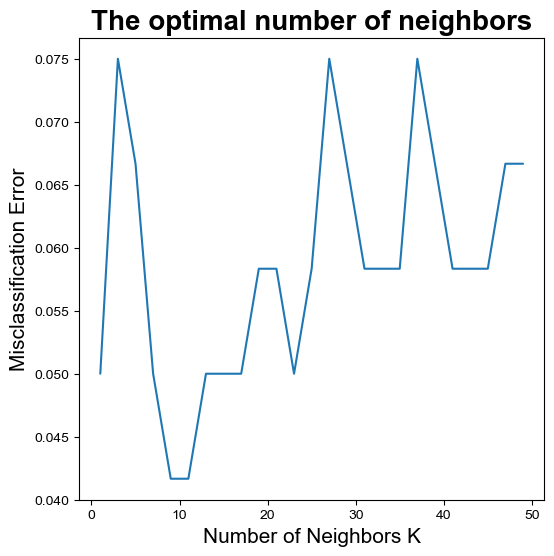

In [13]:
MSE = [1 - x for x in cv_scores]
#Ploting the graph
plt.figure()
plt.figure(figsize=(6,6))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
#Showing the graph
plt.show()

In [14]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


In [15]:
knn = KNeighborsClassifier(n_neighbors = 7)
##Then Fit X train and y train to classifier
knn.fit(X_train, y_train)
##Predict on x test 
Y_pred = knn.predict(X_test) 
#Making the prediction on X_train
Y_pred1 = knn.predict(X_train)

In [16]:
print("KNN model accuracy(in %) for Training:", metrics.accuracy_score(y_train, Y_pred1)*100)
print("KNN model accuracy(in %) for Testing:", metrics.accuracy_score(y_test, Y_pred)*100)

KNN model accuracy(in %) for Training: 96.66666666666667
KNN model accuracy(in %) for Testing: 100.0


In [17]:
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
print('Confusion matrix for KNN\n',cm)
print('Overall accuracy_KNN : %.3f' %accuracy)

Confusion matrix for KNN
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Overall accuracy_KNN : 1.000


In [18]:
result1 = classification_report(y_test, Y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,Y_pred)
print("Overall Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Overall Accuracy: 1.0


In [19]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [20]:
print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)
print('Precision:', PPV)
print('Negative Precision:' ,NPV)
print('False Positive Rate:' ,FPR)
print('False Negative Rate:' ,FNR)
print('False Discover Rate:', FDR)
print('Overall Accuracy',ACC)

Sensitivity: [1. 1. 1.]
Specificity:  [1. 1. 1.]
Precision: [1. 1. 1.]
Negative Precision: [1. 1. 1.]
False Positive Rate: [0. 0. 0.]
False Negative Rate: [0. 0. 0.]
False Discover Rate: [0. 0. 0.]
Overall Accuracy [1. 1. 1.]


In [21]:
#k=3, 96
#k=5, 96
#k=7, 100